# 1.Introduction (Problem)

## As of 2015, there are 2.23 million Koreans living in the United States and about 100,000 Koreans living in New York. In New York, where 8.4 million people live, the proportion of Koreans is about 1.2%, which is very low, but recently, the interest in Korean culture in American society has been increasing as we have seen Korean pop such as Psy and BTS and Korean dramas. The purpose of this project is to analyze and visualize information about Korean restaurants to New Yorkers and tourists to provide the following information to citizens and tourists who interested in Korean food.

### 1) Identify areas with many Korean restaurants
### 2) Providing information such as the highest rated restaurants
### This data will be used as information for promoting Korean food to local communities such as K-food events in the future.

# 2.Data and Methodology

### 1.https://cocl.us/new_york_dataset for use data source(list of boroughs, neighbourghoods and geographical)  from NYC
### 2. Foursquare API for information of Korean restaurants
### 3. The visualization of the neighborhoods will be achieved using folium library with Python. 
### The data analysis and results will be done with Python programming using the Jupyter Notebook platform.

# 3.Data analysis and results

In [147]:
# import libraries:

from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import geocoder
import os
import folium # this will create the map of New York City
from geopy.geocoders import Nominatim

# import Matplotlib modules:

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline


In [158]:

CLIENT_ID = 'VNNIPRJJZGSG0AFM0KDWB3PNHFJU4XH0Z2CRXCVFNULC0W4F' # your Foursquare ID
CLIENT_SECRET = 'MYHPQFVC4AM1QT3Y0SZH1BX4V0GZ0DACBSPDSH1W51M0Z11C' # your Foursquare Secret
VERSION = '20180604'

In [159]:
def geo_location(addr):
    geolocator = Nominatim(user_agent="newyork_explorer")
    location = geolocator.geocode(addr)
    latitude = location.latitude
    longitude = location.longitude
    return latitude, longitude

In [160]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [161]:
def get_venue_details(venue_id):
        
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [162]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_coord = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_coord[1]
        neighborhood_lon = neighborhood_coord[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

In [163]:
# get New York City data

new_york_data=get_new_york_data()
new_york_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [164]:
# get the total number of neighborhoods in New York City

new_york_data.shape

(306, 4)

### Show the five neighborhoods w. their borough and coordinates and total of 306 neighborhoods in NYC

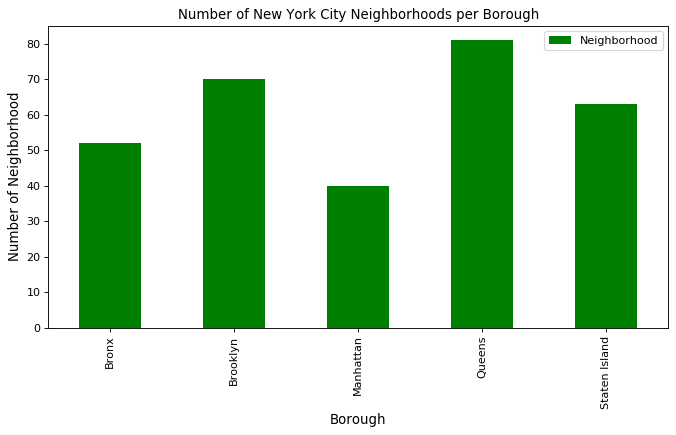

In [165]:
# Plot of a bar chart to show the number of neighborhood per borough

plt.figure(figsize=(10,5), dpi = 80)
plt.title('Number of New York City Neighborhoods per Borough')
plt.xlabel('Borough', fontsize = 12)
plt.ylabel('Number of Neighborhood', fontsize=12)
new_york_data.groupby('Borough')['Neighborhood'].count().plot(kind='bar', color='green')
plt.legend()

plt.show()

In [168]:
# Obtain the information of African restaurants per neighborhood

column_names=['Borough', 'Neighborhood', 'ID','Name']
korean_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in new_york_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    korean_restaurants=venues[venues['Category']=='Korean Restaurant']   
    print('(',count,'of',len(new_york_data),')','Korean Restaurants in '+Neighborhood+', '+Borough+':'+str(len(african_restaurants)))
    for restaurant_detail in korean_restaurants.values.tolist():
        id, name , category=restaurant_detail
        korean_rest_ny = korean_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 of 306 ) Korean Restaurants in Wakefield, Bronx:0
( 2 of 306 ) Korean Restaurants in Co-op City, Bronx:0
( 3 of 306 ) Korean Restaurants in Eastchester, Bronx:0
( 4 of 306 ) Korean Restaurants in Fieldston, Bronx:0
( 5 of 306 ) Korean Restaurants in Riverdale, Bronx:0
( 6 of 306 ) Korean Restaurants in Kingsbridge, Bronx:0
( 7 of 306 ) Korean Restaurants in Marble Hill, Manhattan:0
( 8 of 306 ) Korean Restaurants in Woodlawn, Bronx:0
( 9 of 306 ) Korean Restaurants in Norwood, Bronx:0
( 10 of 306 ) Korean Restaurants in Williamsbridge, Bronx:0
( 11 of 306 ) Korean Restaurants in Baychester, Bronx:0
( 12 of 306 ) Korean Restaurants in Pelham Parkway, Bronx:0
( 13 of 306 ) Korean Restaurants in City Island, Bronx:0
( 14 of 306 ) Korean Restaurants in Bedford Park, Bronx:0
( 15 of 306 ) Korean Restaurants in University Heights, Bronx:0
( 16 of 306 ) Korean Restaurants in Morris Heights, Bronx:0
( 17 of 306 ) Korean Restaurants in Fordham, Bronx:0
( 18 of 306 ) Korean Restaurants in Ea

In [169]:
# Korean restaurants' analysis

korean_rest_ny.head()

,Borough,Neighborhood,ID,Name
0,Brooklyn,Bensonhurst,57049cb4498efcebf6578c1b,Cafe Lily
1,Brooklyn,Brighton Beach,4c9d5c0303133704a96f5ed5,Cafe At Your Mother-in-Law
2,Brooklyn,Prospect Heights,4fa162e0e4b0badc81404a51,Kimchi Grill
3,Brooklyn,Williamsburg,52bf3053498e754b09a440b5,Dotory
4,Brooklyn,Bushwick,5cf40f14d552c7002c6cc481,Kichin


In [170]:
korean_rest_ny.shape

(103, 4)

### there are over 100 Korean Restaurants obtained via the Foursquare API

### The result show that:
#### 1. Queens has the largest number of Korean restaurant per Borough, with over 80 restaurants
#### 2. Manhatthan has 2nd largest number of Korean restaurant, over 10 restaurants
#### 3. Murray Hill has the largest number of Korean restuarant each neighborhoods, total of 40 restaurants

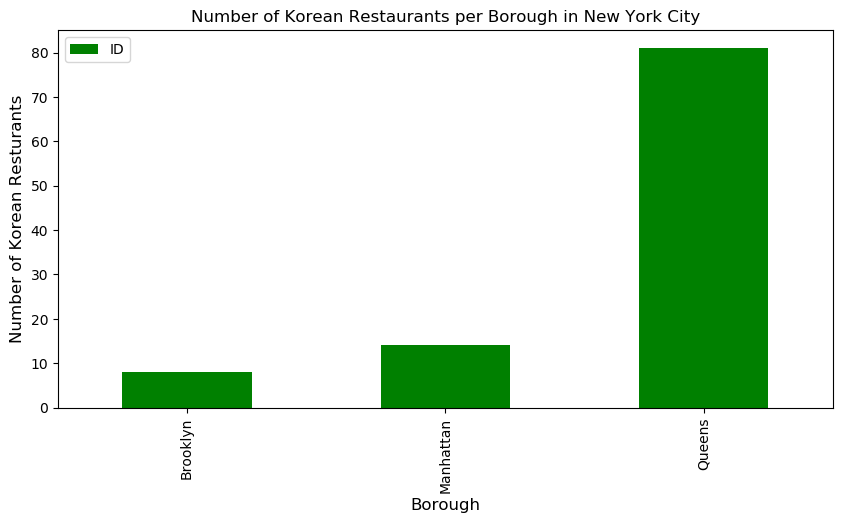

In [171]:
# Plot of a bar chart to show the number of Korean Restaurants per Borough

plt.figure(figsize=(10,5), dpi = 100)
plt.title('Number of Korean Restaurants per Borough in New York City')
plt.xlabel('Borough', fontsize = 12)
plt.ylabel('Number of Korean Resturants', fontsize=12)
korean_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar', color = 'green')
plt.legend()

plt.show()

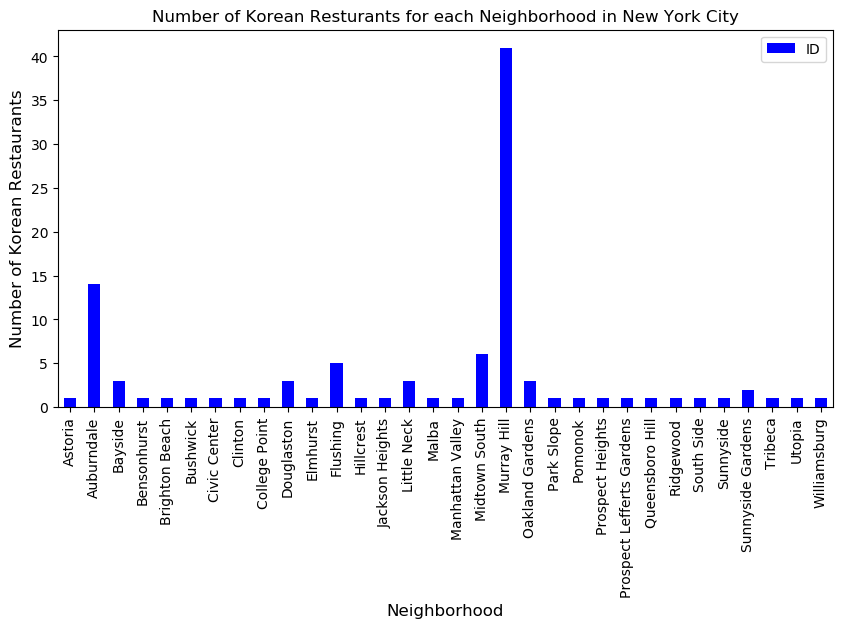

In [172]:
# Plot of a bar chart to show the number of Korean Restaurants per Neighborhood

plt.figure(figsize=(10,5), dpi = 100)
plt.title('Number of Korean Resturants for each Neighborhood in New York City')
plt.xlabel('Neighborhood', fontsize = 12)
plt.ylabel('Number of Korean Restaurants', fontsize=12)
korean_rest_ny.groupby('Neighborhood')['ID'].count().plot(kind='bar', color = 'blue')
plt.legend()

plt.show()

In [173]:

# Show all the restaurants in Central Harlem

korean_rest_ny[korean_rest_ny['Neighborhood']=='Murray Hill']

,Borough,Neighborhood,ID,Name
9,Manhattan,Murray Hill,547d03e3498eb32c879589da,Baekjeong NYC (Kang Ho Dong Baekjeong)
10,Manhattan,Murray Hill,5b08ede88e886a002c2e85d8,Atomix
11,Manhattan,Murray Hill,517563f9498e0a4859d08fe4,BCD Tofu House
12,Manhattan,Murray Hill,540f86da498e020149fa7676,Jongro BBQ
52,Queens,Murray Hill,4b830e44f964a520ebf430e3,Hahm Ji Bach - 함지박
53,Queens,Murray Hill,4b8f0931f964a520d04533e3,Mapo BBQ
54,Queens,Murray Hill,49e10e0bf964a52089611fe3,Mad For Chicken
55,Queens,Murray Hill,4baeabe6f964a52037cd3be3,Kum Sung Chik Naengmyun
56,Queens,Murray Hill,4c7ad3dda86837048bee144d,Geo Si Gi Restaurant
57,Queens,Murray Hill,56db53cc498eed9b68621019,SGD Tofu House


In [174]:
# Create a list of neighborhoods with Korean restaurants

column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
korean_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1

for row in korean_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        id,name,likes,rating,tips=[0]*5
    print('(',count,'of',len(korean_rest_ny),')','processed')
    korean_rest_stats_ny = korean_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID       Name  Likes  Rating  Tips
0  57049cb4498efcebf6578c1b  Cafe Lily      8     6.5     7
( 1 of 103 ) processed
                         ID                        Name  Likes  Rating  Tips
0  4c9d5c0303133704a96f5ed5  Cafe At Your Mother-in-Law     30     7.4    28
( 2 of 103 ) processed
                         ID          Name  Likes  Rating  Tips
0  4fa162e0e4b0badc81404a51  Kimchi Grill    289     8.4   108
( 3 of 103 ) processed
                         ID    Name  Likes  Rating  Tips
0  52bf3053498e754b09a440b5  Dotory    139     8.4    44
( 4 of 103 ) processed
                         ID    Name  Likes  Rating  Tips
0  5cf40f14d552c7002c6cc481  Kichin     27     9.0     4
( 5 of 103 ) processed
                         ID     Name  Likes  Rating  Tips
0  5bba42ff7dc9e1002cd1a1df  Haenyeo     79     8.6    13
( 6 of 103 ) processed
                         ID        Name  Likes  Rating  Tips
0  5ae4e10ffe3740002d8a897e  Slow Loris     16     8.4   

KeyError: 'venue'

In [176]:
korean_rest_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Brooklyn,Bensonhurst,57049cb4498efcebf6578c1b,Cafe Lily,8,6.5,7
1,Brooklyn,Brighton Beach,4c9d5c0303133704a96f5ed5,Cafe At Your Mother-in-Law,30,7.4,28
2,Brooklyn,Prospect Heights,4fa162e0e4b0badc81404a51,Kimchi Grill,289,8.4,108
3,Brooklyn,Williamsburg,52bf3053498e754b09a440b5,Dotory,139,8.4,44
4,Brooklyn,Bushwick,5cf40f14d552c7002c6cc481,Kichin,27,9.0,4


In [177]:
korean_rest_stats_ny.shape

(50, 7)

In [179]:

# Save the above data in CSV and verify the data from the CSV file

korean_rest_stats_ny.to_csv('korean_rest_stats_ny.csv', index=False)

In [180]:
korean_rest_stats_ny_csv=pd.read_csv('korean_rest_stats_ny.csv') # verify

In [182]:
korean_rest_stats_ny_csv.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Brooklyn,Bensonhurst,57049cb4498efcebf6578c1b,Cafe Lily,8,6.5,7
1,Brooklyn,Brighton Beach,4c9d5c0303133704a96f5ed5,Cafe At Your Mother-in-Law,30,7.4,28
2,Brooklyn,Prospect Heights,4fa162e0e4b0badc81404a51,Kimchi Grill,289,8.4,108
3,Brooklyn,Williamsburg,52bf3053498e754b09a440b5,Dotory,139,8.4,44
4,Brooklyn,Bushwick,5cf40f14d552c7002c6cc481,Kichin,27,9.0,4


In [183]:
korean_rest_stats_ny_csv.shape

(50, 7)

In [184]:
korean_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       50 non-null     object 
 1   Neighborhood  50 non-null     object 
 2   ID            50 non-null     object 
 3   Name          50 non-null     object 
 4   Likes         50 non-null     object 
 5   Rating        50 non-null     float64
 6   Tips          50 non-null     object 
dtypes: float64(1), object(6)
memory usage: 2.9+ KB


In [185]:

# Covert 'Likes' and 'Tips' into float

korean_rest_stats_ny['Likes']=korean_rest_stats_ny['Likes'].astype('float64')

In [186]:
korean_rest_stats_ny['Tips']=korean_rest_stats_ny['Tips'].astype('float64')

In [187]:
korean_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       50 non-null     object 
 1   Neighborhood  50 non-null     object 
 2   ID            50 non-null     object 
 3   Name          50 non-null     object 
 4   Likes         50 non-null     float64
 5   Rating        50 non-null     float64
 6   Tips          50 non-null     float64
dtypes: float64(3), object(4)
memory usage: 2.9+ KB


### Tee result shows that 'Likes', 'Ratings' and 'Tips' are now float and can be manipulfated mathematically

In [188]:
# Restaurant with maximum Likes

korean_rest_stats_ny.iloc[korean_rest_stats_ny['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood                 Murray Hill
ID              517563f9498e0a4859d08fe4
Name                      BCD Tofu House
Likes                               1228
Rating                               8.7
Tips                                 205
Name: 11, dtype: object

In [189]:
# Restaurant with minimum Likes

korean_rest_stats_ny.iloc[korean_rest_stats_ny['Likes'].idxmin()]

Borough             Queens
Neighborhood    Auburndale
ID                       0
Name                     0
Likes                    0
Rating                   0
Tips                     0
Name: 42, dtype: object

In [190]:
# Restaurant with maximum Rating

korean_rest_stats_ny.iloc[korean_rest_stats_ny['Rating'].idxmax()]

Borough                         Brooklyn
Neighborhood                    Bushwick
ID              5cf40f14d552c7002c6cc481
Name                              Kichin
Likes                                 27
Rating                                 9
Tips                                   4
Name: 4, dtype: object

In [191]:
# Restaurant with minimum Rating

korean_rest_stats_ny.iloc[korean_rest_stats_ny['Rating'].idxmin()]

Borough             Queens
Neighborhood    Auburndale
ID                       0
Name                     0
Likes                    0
Rating                   0
Tips                     0
Name: 42, dtype: object

In [192]:
# Restaurant with maximum Tips

korean_rest_stats_ny.iloc[korean_rest_stats_ny['Tips'].idxmax()]

Borough                        Manhattan
Neighborhood                 Murray Hill
ID              517563f9498e0a4859d08fe4
Name                      BCD Tofu House
Likes                               1228
Rating                               8.7
Tips                                 205
Name: 11, dtype: object

In [193]:
# Restaurant with minimum Tips

korean_rest_stats_ny.iloc[korean_rest_stats_ny['Tips'].idxmin()]

Borough             Queens
Neighborhood    Auburndale
ID                       0
Name                     0
Likes                    0
Rating                   0
Tips                     0
Name: 42, dtype: object

In [194]:
# Synthesize rating information per Neighborhood

ny_neighborhood_stats=korean_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']

In [195]:
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(12)

,Neighborhood,Average Rating
5,Bushwick,9.00
14,Murray Hill,8.80
22,Tribeca,8.60
16,Park Slope,8.60
23,Williamsburg,8.40
20,South Side,8.40
18,Prospect Lefferts Gardens,8.40
17,Prospect Heights,8.40
13,Manhattan Valley,8.10
0,Astoria,8.10


In [196]:
# Synthesize rating information per Borough

ny_borough_stats=korean_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']

In [197]:
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
1,Manhattan,8.542857
0,Brooklyn,8.137500
2,Queens,5.865714


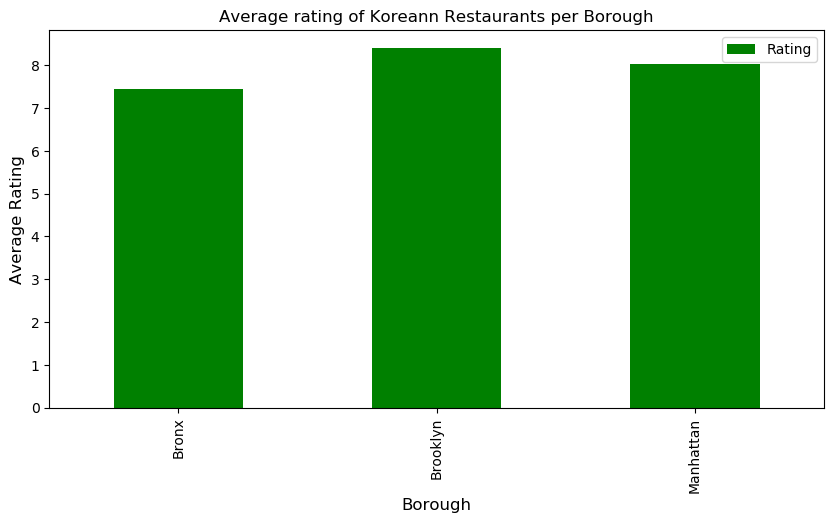

In [210]:

# Plot of bar chart to show Average Ranking per Borough

plt.figure(figsize=(10,5), dpi = 100)
plt.title('Average rating of Koreann Restaurants per Borough')
plt.xlabel('Borough', fontsize = 12)
plt.ylabel('Average Rating', fontsize=12)
african_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar', color = 'green')
plt.legend()

plt.show()

### For this project, neighborhoods with avearge rating greater or equal 7.0 will be visualize on the map

In [199]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=7.0]

In [200]:
ny_neighborhood_stats

,Neighborhood,Average Rating
0,Astoria,8.10
2,Bayside,7.10
4,Brighton Beach,7.40
5,Bushwick,9.00
6,Clinton,7.90
7,College Point,7.50
9,Elmhurst,7.50
10,Flushing,7.76
11,Jackson Heights,7.50
13,Manhattan Valley,8.10


In [201]:
# Merge Neighborhoods and coordinates

ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,new_york_data, on='Neighborhood')

In [202]:
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]

In [203]:
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Queens,Astoria,40.768509,-73.915654,8.10
1,Queens,Bayside,40.766041,-73.774274,7.10
2,Brooklyn,Brighton Beach,40.576825,-73.965094,7.40
3,Brooklyn,Bushwick,40.698116,-73.925258,9.00
4,Manhattan,Clinton,40.759101,-73.996119,7.90
5,Queens,College Point,40.784903,-73.843045,7.50
6,Queens,Elmhurst,40.744049,-73.881656,7.50
7,Queens,Flushing,40.764454,-73.831773,7.76
8,Queens,Jackson Heights,40.751981,-73.882821,7.50
9,Manhattan,Manhattan Valley,40.797307,-73.964286,8.10


In [204]:
# create map and display the locations

ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)

In [205]:
incidents = folium.map.FeatureGroup()

for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, 
            color='brown',
            fill=True,
            fill_color='purple',
            fill_opacity=0.6
        )
    )

In [206]:
# labels and markers


ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'

In [207]:
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        

ny_map.add_child(incidents)

In [208]:
# New York Map

ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
ny_geo = r'C:/anaconda3/nyu_2451_34572-geojson.json'

ny_map.choropleth(
    geo_data=ny_geo,
    data=ny_borough_stats,
    columns=['Borough', 'Average Rating'],
    key_on='feature.properties.boro_name',
    fill_color='YlOrRd', 
    fill_opacity=0.6, 
    line_opacity=0.2,
    legend_name='Average Rating'
)

ny_map.save('borough_rating.html')

In [209]:
# New York Map output

ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
ny_geo = r'C:/anaconda3/nyu_2451_34572-geojson.json'

ny_map.choropleth(
    geo_data=ny_geo,
    data=ny_borough_stats,
    columns=['Borough', 'Average Rating'],
    key_on='feature.properties.boro_name',
    fill_color='YlOrRd', 
    fill_opacity=0.6, 
    line_opacity=0.2,
    legend_name='Average Rating'
)

ny_map

# Summary and conclusion

## The objectives of the projects include the visualization and analysis Korean restaurants in New York City 
### There are 103 Korean restaurants in New York City. About 80% of these restaurants are located in Queens. This is considered to be related to most Koreans living in New York, Queens. There are many Korean restaurants in Queens Park, but the highest rated restaurant was Kichin in Bushwik, Brooklyn and BCD Tofu House in Murray Hill, Manhattan.
### There are two Murray Hill in NYC, Manhattan and Queens. The regional rating of Murry Hill is very high with 8.8 points, but this is Murry Hill in Manhattan.
### Queens has many Korean restaurants, but has a low rating of 5.8.
## This is likely to be a very frustrating meal if New Yorkers and tourists misunderstand it as a restaurant in Murry Hill, Queens, where many Koreans live. As a result, your chances of lowering your interest in Korean food are very high. In order to use it as a K-food guide, you have to be aware that it is Murry Hill in Manhattan.
